In [3]:
import mdtraj as md
import analysis

In [8]:
import numpy as np

In [4]:
traj = md.load('testing/3_tot.xtc', top='../mlx_v2/dcd/us_part4/run.gro')

lipid_p_indices = traj.topology.select('resname POPC and name P')



In [21]:
prot_indices1 = traj.topology.select('resid 1 to 20 and name CA')
analyzer = analysis.depth_analysis(traj, prot_indices1, lipid_p_indices)
penetration_depth1 = analyzer.compute_penetration_depth()

In [23]:
prot_indices2 = traj.topology.select('resid 21 to 40 and name CA')
analyzer = analysis.depth_analysis(traj, prot_indices2, lipid_p_indices)
penetration_depth2 = analyzer.compute_penetration_depth()

In [24]:
prot_indices3 = traj.topology.select('resid 41 to 63 and name CA')
analyzer = analysis.depth_analysis(traj, prot_indices3, lipid_p_indices)
penetration_depth3 = analyzer.compute_penetration_depth()

In [20]:
np.shape(penetration_depth)

(927, 63)

In [25]:
residue_ids1 = list(range(1, 21))
residue_ids2 = list(range(22, 40))
residue_ids3 = list(range(41, 64))

In [26]:
import pandas as pd

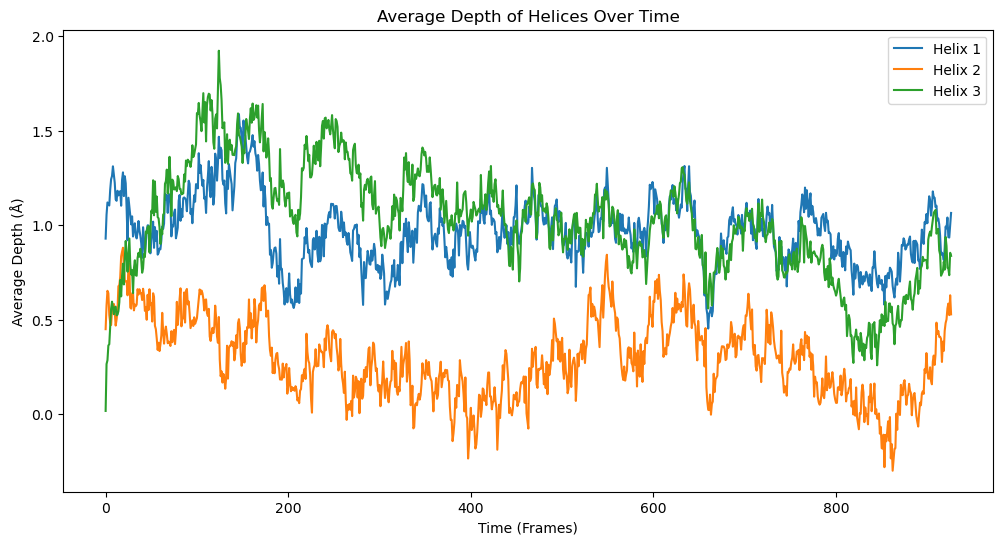

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Split penetration_depth array into three groups
penetration_depth_helix1 = np.array(penetration_depth)[:, :20]
penetration_depth_helix2 = np.array(penetration_depth)[:, 20:39]
penetration_depth_helix3 = np.array(penetration_depth)[:, 39:]

# Calculate the average depth for each group
average_depth_helix1 = np.mean(penetration_depth_helix1, axis=1)
average_depth_helix2 = np.mean(penetration_depth_helix2, axis=1)
average_depth_helix3 = np.mean(penetration_depth_helix3, axis=1)

# Create a new DataFrame with the average depths
df_average_depth = pd.DataFrame({
    'Helix1': average_depth_helix1,
    'Helix2': average_depth_helix2,
    'Helix3': average_depth_helix3
})

# Plot the depths over time
plt.figure(figsize=(12, 6))
plt.plot(df_average_depth['Helix1'], label='Helix 1')
plt.plot(df_average_depth['Helix2'], label='Helix 2')
plt.plot(df_average_depth['Helix3'], label='Helix 3')
plt.xlabel('Time (Frames)')
plt.ylabel('Average Depth (Å)')
plt.title('Average Depth of Helices Over Time')
plt.legend()
plt.show()
